# Customer Segmentation and Analysis 

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

**Problem Statement**

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

## Importing Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")

## Data Exploration

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Data Visualization

In [7]:
sns.set_style('darkgrid')

### Histograms

let's see the distributions of numerical features

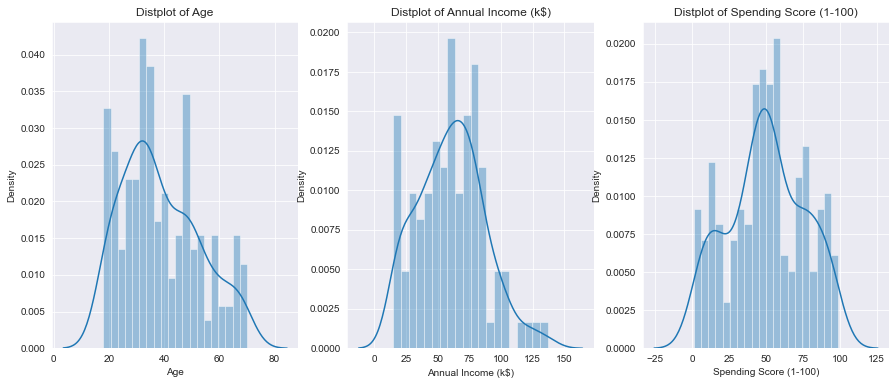

In [8]:
fig, ax = plt.subplots(1 , 3 , figsize = (15 , 6))
plots = ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']
for i in range(3):
    sns.distplot(df[plots[i]] , bins = 20, ax=ax[i])
    ax[i].set_title('Distplot of {}'.format(plots[i]))
plt.show()

### Count Plot of Gender

How many males and females are in the data

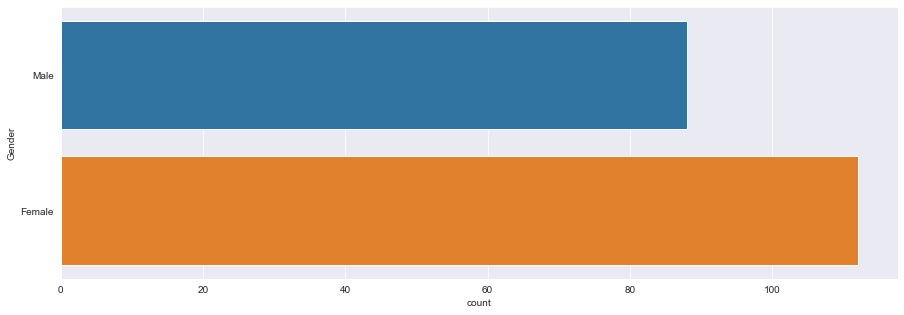

In [9]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

### Ploting the Relation between Age , Annual Income and Spending Score

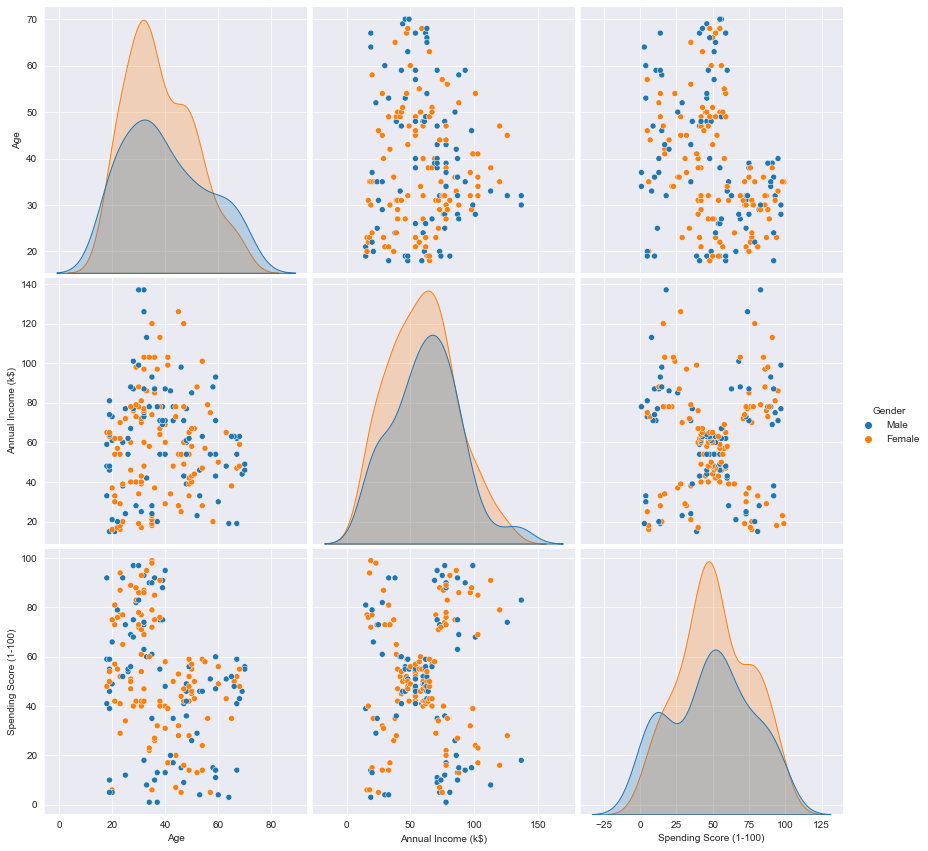

In [10]:
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', size=4)
plt.show()

### Distribution of values in Age , Annual Income and Spending Score according to Gender

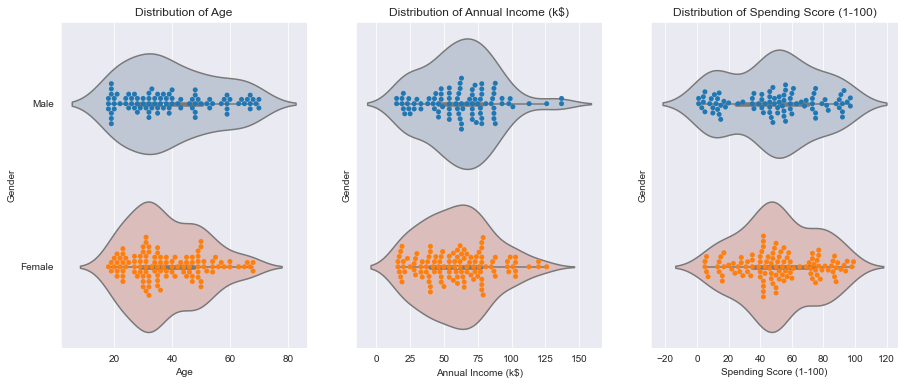

In [11]:
fig, ax = plt.subplots(1 , 3 , figsize = (15 , 6), sharey=True)
plots = ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']
for i in range(3):
    sns.violinplot(x = plots[i], y = 'Gender', palette = 'vlag', data = df, ax=ax[i])
    sns.swarmplot(x = plots[i], y = 'Gender', data = df, ax=ax[i])
    ax[i].set_title('Distribution of {}'.format(plots[i]))
plt.show()

## Clustering using K- means
### 1.Segmentation using Age and Spending Score

In [15]:
set1 = df[['Age' , 'Spending Score (1-100)']]
inertia = []
for n in range(1 , 11):
    model = KMeans(n_clusters = n)
    model.fit(X1)
    inertia.append(model.inertia_)

### Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)

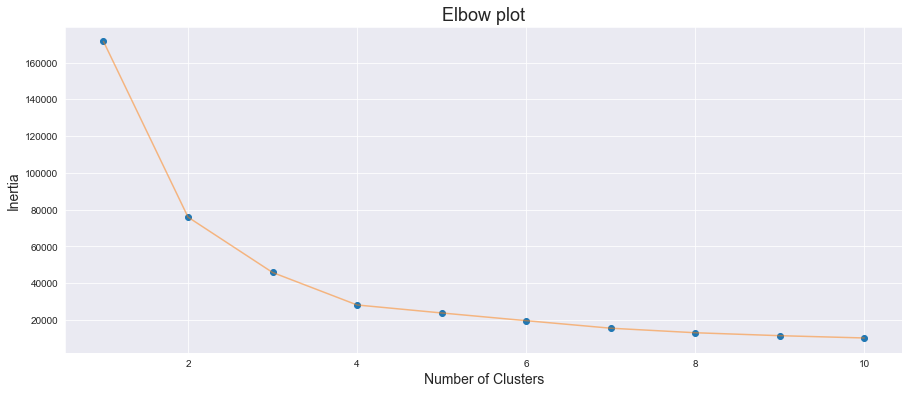

In [16]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-' , alpha = 0.5)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.title('Elbow plot', fontsize=18)
plt.show()

From the elbow plot, I think that 4 is a good number for clusters

In [17]:
model = KMeans(n_clusters = 4) 
model.fit(set1)
labels1 = model.labels_
centroids1 = model.cluster_centers_

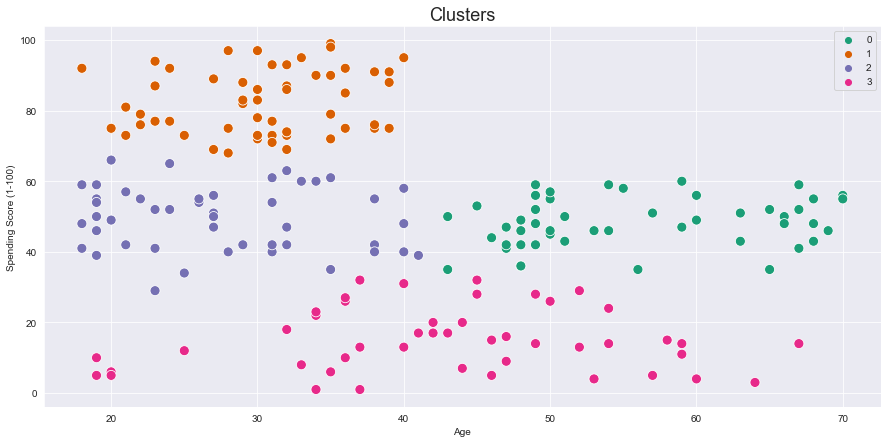

In [18]:
plt.figure(1 , figsize = (15 , 7))
sns.scatterplot(x='Age' ,y='Spending Score (1-100)' , data=df , hue=labels1, s=100, palette='Dark2')
plt.title('Clusters', fontsize=18)
plt.show()

### 2. Segmentation using  Annual Income and Spending Score

In [19]:
set2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']]
inertia = []
for n in range(1 , 11):
    model = KMeans(n_clusters = n)
    model.fit(set2)
    inertia.append(model.inertia_)

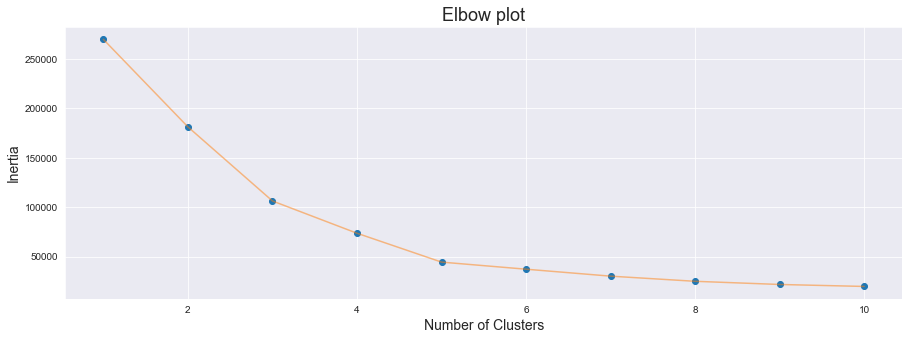

In [20]:
plt.figure(1 , figsize = (15, 5))
plt.plot(np.arange(1, 11), inertia , 'o')
plt.plot(np.arange(1, 11), inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.title('Elbow plot', fontsize=18)
plt.show()

5 clusters seem a good number here

In [21]:
model = KMeans(n_clusters = 5)
model.fit(set2)
labels2 = model.labels_
centroids2 = model.cluster_centers_

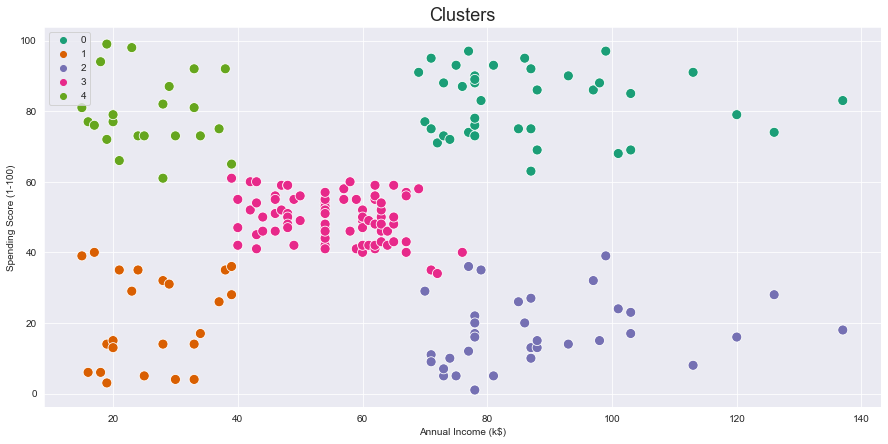

In [22]:
plt.figure(1 , figsize = (15 , 7))
sns.scatterplot(x='Annual Income (k$)' ,y='Spending Score (1-100)' , data=df , hue=labels2, s=100, palette='Dark2')
plt.title('Clusters', fontsize=18)
plt.show()

### 3.Segmentation using Age , Annual Income and Spending Score

In [23]:
set3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']]
inertia = []
for n in range(1, 11):
    model = KMeans(n_clusters = n)
    model.fit(set3)
    inertia.append(model.inertia_)

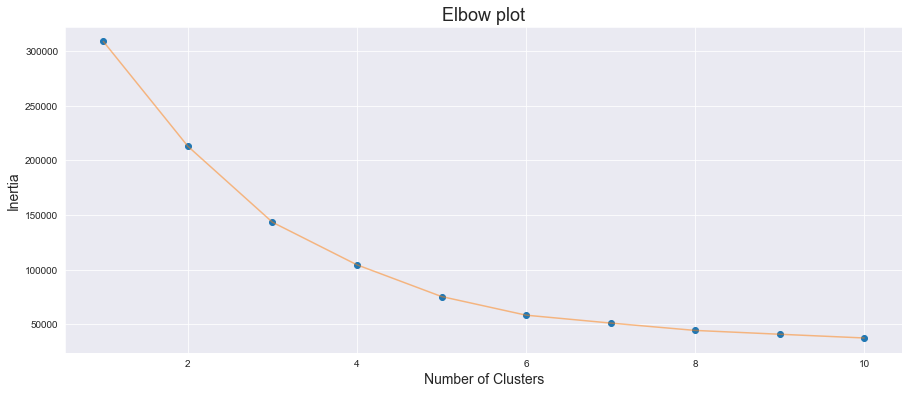

In [24]:
plt.figure(1, figsize = (15 ,6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.title('Elbow plot', fontsize=18)
plt.show()

In [25]:
model = KMeans(n_clusters = 6)
model.fit(set3)
labels3 = model.labels_
centroids3 = model.cluster_centers_